# Mix and match languages: Julia

In [1]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [2]:
%julia @pyimport matplotlib.pyplot as plt
%julia @pyimport numpy as np
%matplotlib inline

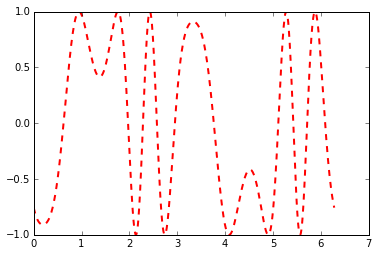

In [3]:
%%julia
# Note how we mix numpy and julia:
t = linspace(0,2*pi,1000); # use the julia linspace
s = sin(3*t + 4*np.cos(2*t)); # use the numpy cosine and julia sine
fig = plt.gcf()  # **** WATCH THIS VARIABLE ****
plt.plot(t, s, color="red", linewidth=2.0, linestyle="--")

# Deep cross-language integration

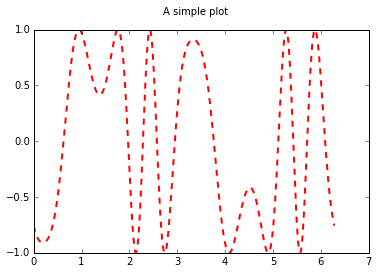

In [4]:
fig = %julia fig           # Python % Julia
fig.suptitle('A simple plot')    # Python
fig                              # Python  

# The stack as a layer cake

In [14]:
from __future__ import print_function

jlfib = %julia _fib(n, pyfib) = n < 2 ? n : pyfib(n-1, _fib) + pyfib(n-2, _fib)
    
def pyfib(n, _fib):
    print('(P', end='')
    if n < 2:
         r = n
    else:
        print('(J', end='')
        r =  _fib(n-1, pyfib) + _fib(n-2, pyfib)
        print(')',end='')
    return r

fibonacci = lambda x: pyfib(x, jlfib)

fibonacci(10)

(P(J(P(J(P(J(P(J(P(J)(P(P(P)(P(J(P(P)(P(J(P(P)(P(J))(P(J(P(J(P(P)(P(J)(P(J)(P)(P(J(P(J(P(P)(P(J)(P(J)(P)(P(J(P(J)(P(P(P))(P(J(P(J(P(J(P(P)(P(J)(P(J)(P)(P(J(P(J)(P(P(P)(P(J(P(J)(P(P(P)(P(J(P(P))(P(J(P(J(P(J(P(P)(P(J)(P(J)(P)(P(J(P(J)(P(P(P)(P(J(P(J)(P(P(P)(P(J(P(P))(P(J(P(J(P(J)(P(P(P)(P(J(P(P)(P(J(P(P)(P(J)))

55

# CFFI

## Mix and Match : C

Expose some ability to inline C and rust through CFFI

In [15]:
import cffi_magic

In [16]:
%%cffi int triple(int);
int triple(int n)
{
    return 3*n;
}

In [17]:
triple(7)

21

## Mix and Match : rust

In [22]:
%%rust int double(int);

#[no_mangle]
pub extern fn double(x: i32) -> i32 {
    x*2
}

injecting  double in user ns


### Mix and Match : Rust & C

In [23]:
sextuple = lambda x:triple(double(x))
sextuple(3)

18

## All in one

In [24]:
import sys
!#{sys.executable} -m pip install ipywidgets --upgrade

In [25]:
from ipywidgets import interact

@interact(x=(0,10))
def allinone(x=4):
    return sextuple(fibonacci(x))

(P(J(P(J)(P(P(P)

18


### TL:DR;

    (Visualisation Side) 
      Javascript 
        -> Python 
           -> C 
             -> rust 
               -> (Julia<->Python)*N
    (Data/Computation side)
    
Note that Python Side, can use SciPy that can rely on C (again) and on Fortran.
Not shown here, communication with R, Bash, ...
    